# Global NWP Model Data

In [1]:
from siphon.catalog import TDSCatalog
import datetime as dt
import pandas as pd
import numpy as np
import xarray as xr
import os

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import glob

## Obtain Latest GFS Data

In [2]:
#find the latest run of the GFS available uisng siphon
latest_gfs = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml')
path = f'https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p25deg/{latest_gfs.datasets[0]}'
date_time = dt.datetime.strptime(str(latest_gfs.datasets[0])[-19:-8], '%Y%m%d_%H')

print(f'The latest run of the GFS was initialized on {date_time.strftime("%B %d, %Y")} at {str(latest_gfs.datasets[0])[28:30]} UTC.')

The latest run of the GFS was initialized on July 30, 2023 at 12 UTC.


In [3]:
#open the latest GFS dataset
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:                                                                     (
                                                                                 lat: 721,
                                                                                 lon: 1440,
                                                                                 time: 92,
                                                                                 time1: 182,
                                                                                 time2: 93,
                                                                                 ...
                                                                                 height_above_ground_layer_bounds_1: 2,
                                                                                 height_above_ground_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer2_bounds_1: 2,
                                                                                 sigma_layer_bounds_1: 2,
                                                                                 depth_below_surface_layer_bounds_1: 2)
Coordinates: (12/28)
  * lat                                                                         (lat) float32 ...
  * lon                                                                         (lon) float32 ...
    reftime                                                                     datetime64[ns] ...
  * time                                                                        (time) datetime64[ns] ...
  * time1                                                                       (time1) datetime64[ns] ...
  * time2                                                                       (time2) datetime64[ns] ...
    ...                                                                          ...
  * height_above_ground4                                                        (height_above_ground4) float32 ...
  * height_above_ground5                                                        (height_above_ground5) float32 ...
  * potential_vorticity_surface                                                 (potential_vorticity_surface) float32 ...
  * sigma                                                                       (sigma) float32 ...
  * hybrid                                                                      (hybrid) float32 ...
  * hybrid1                                                                     (hybrid1) float32 ...
Dimensions without coordinates: time1_bounds_1, time3_bounds_1,
                                pressure_difference_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                sigma_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/180)
    LatLon_Projection                                                           int32 ...
    time1_bounds                                                                (time1, time1_bounds_1) datetime64[ns] ...
    time3_bounds                                                                (time3, time3_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                            (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                            (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    height_above_ground_layer1_bounds                                  

## Create New Directory

In [4]:
#set temp and precip directories
temp_dir = f'/home/jcorner1/ISARRA/Images/Temp/{date_time.strftime("%Y%m%dT%H00")}'
precip_dir = f'/home/jcorner1/ISARRA/Images/Precip/{date_time.strftime("%Y%m%dT%H00")}'

#create directory
os.mkdir(temp_dir)
os.mkdir(precip_dir)

## Subset the Data

In [5]:
#time window for when i'll be in Bergen
beg_time = dt.datetime(2023, 7, 31, 12, 0)
end_time = dt.datetime(2023, 8, 4, 12, 0)

str_beg = beg_time.strftime('%Y-%m-%dT%H:00:00.000000000')
str_end = end_time.strftime('%Y-%m-%dT%H:00:00.000000000')

In [6]:
#find start and end times in the datasets
beg_val = np.where(ds.time1.values == np.datetime64(str_beg))
end_val = np.where(ds.time1.values == np.datetime64(str_end))

beg_val1 = np.where(ds.time.values == np.datetime64(str_beg))
end_val1 = np.where(ds.time.values == np.datetime64(str_end))

beg_val2 = np.where(ds.time2.values == np.datetime64(str_beg))
end_val2 = np.where(ds.time2.values == np.datetime64(str_end))

In [7]:
#logic statements finding times within the time window. 
if beg_val[0].shape[0] == 0:
    ds_sel = ds.sel(time = ds.time.values[:int(end_val1[0])], time1 = ds.time1.values[:int(end_val[0])], time2=ds.time2.values[:int(end_val2[0])] , time3=ds.time3.values[:int(end_val2[0])])
    
elif end_val[0].shape[0] == 0:
    ds_sel = ds.sel(time = ds.time.values[int(beg_val1[0]):], time1 = ds.time1.values[int(beg_val[0]):], time2=ds.time2.values[int(beg_val2[0]):], time3=ds.time3.values[int(beg_val2[0]):])
    
else:
    ds_sel = ds.sel(time = ds.time.values[int(beg_val1[0]):int(end_val1[0])], time1 = ds.time1.values[int(beg_val[0]):int(end_val[0])], time2=ds.time2.values[int(beg_val2[0]):int(end_val2[0])], time3=ds.time3.values[int(beg_val2[0]):int(end_val2[0])])


In [8]:
#select proper time and heights
ds_sel = ds_sel.sel(height_above_ground2 = 10. , height_above_ground3 = 2.)
ds_sel

<xarray.Dataset>
Dimensions:                                                                     (
                                                                                 lat: 721,
                                                                                 lon: 1440,
                                                                                 time: 32,
                                                                                 time1: 64,
                                                                                 time2: 32,
                                                                                 ...
                                                                                 height_above_ground_layer_bounds_1: 2,
                                                                                 height_above_ground_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer2_bounds_1: 2,
                                                                                 sigma_layer_bounds_1: 2,
                                                                                 depth_below_surface_layer_bounds_1: 2)
Coordinates: (12/28)
  * lat                                                                         (lat) float32 ...
  * lon                                                                         (lon) float32 ...
    reftime                                                                     datetime64[ns] ...
  * time                                                                        (time) datetime64[ns] ...
  * time1                                                                       (time1) datetime64[ns] ...
  * time2                                                                       (time2) datetime64[ns] ...
    ...                                                                          ...
  * height_above_ground4                                                        (height_above_ground4) float32 ...
  * height_above_ground5                                                        (height_above_ground5) float32 ...
  * potential_vorticity_surface                                                 (potential_vorticity_surface) float32 ...
  * sigma                                                                       (sigma) float32 ...
  * hybrid                                                                      (hybrid) float32 ...
  * hybrid1                                                                     (hybrid1) float32 ...
Dimensions without coordinates: time1_bounds_1, time3_bounds_1,
                                pressure_difference_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                sigma_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/180)
    LatLon_Projection                                                           int32 ...
    time1_bounds                                                                (time1, time1_bounds_1) datetime64[ns] ...
    time3_bounds                                                                (time3, time3_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                            (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                            (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    height_above_ground_layer1_bounds                                   

In [9]:
#subset desired data
ds_temp = ds_sel['Temperature_surface'].values
ds_uwnd = ds_sel['u-component_of_wind_height_above_ground'].values
ds_vwnd = ds_sel['v-component_of_wind_height_above_ground'].values
ds_refc = ds_sel['Composite_reflectivity_entire_atmosphere'].values
ds_sel

<xarray.Dataset>
Dimensions:                                                                     (
                                                                                 lat: 721,
                                                                                 lon: 1440,
                                                                                 time: 32,
                                                                                 time1: 64,
                                                                                 time2: 32,
                                                                                 ...
                                                                                 height_above_ground_layer_bounds_1: 2,
                                                                                 height_above_ground_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer1_bounds_1: 2,
                                                                                 pressure_difference_layer2_bounds_1: 2,
                                                                                 sigma_layer_bounds_1: 2,
                                                                                 depth_below_surface_layer_bounds_1: 2)
Coordinates: (12/28)
  * lat                                                                         (lat) float32 ...
  * lon                                                                         (lon) float32 ...
    reftime                                                                     datetime64[ns] ...
  * time                                                                        (time) datetime64[ns] ...
  * time1                                                                       (time1) datetime64[ns] ...
  * time2                                                                       (time2) datetime64[ns] ...
    ...                                                                          ...
  * height_above_ground4                                                        (height_above_ground4) float32 ...
  * height_above_ground5                                                        (height_above_ground5) float32 ...
  * potential_vorticity_surface                                                 (potential_vorticity_surface) float32 ...
  * sigma                                                                       (sigma) float32 ...
  * hybrid                                                                      (hybrid) float32 ...
  * hybrid1                                                                     (hybrid1) float32 ...
Dimensions without coordinates: time1_bounds_1, time3_bounds_1,
                                pressure_difference_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                sigma_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/180)
    LatLon_Projection                                                           int32 ...
    time1_bounds                                                                (time1, time1_bounds_1) datetime64[ns] ...
    time3_bounds                                                                (time3, time3_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                            (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                            (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    height_above_ground_layer1_bounds                                   

## Create Graphs!
### Temperature Map

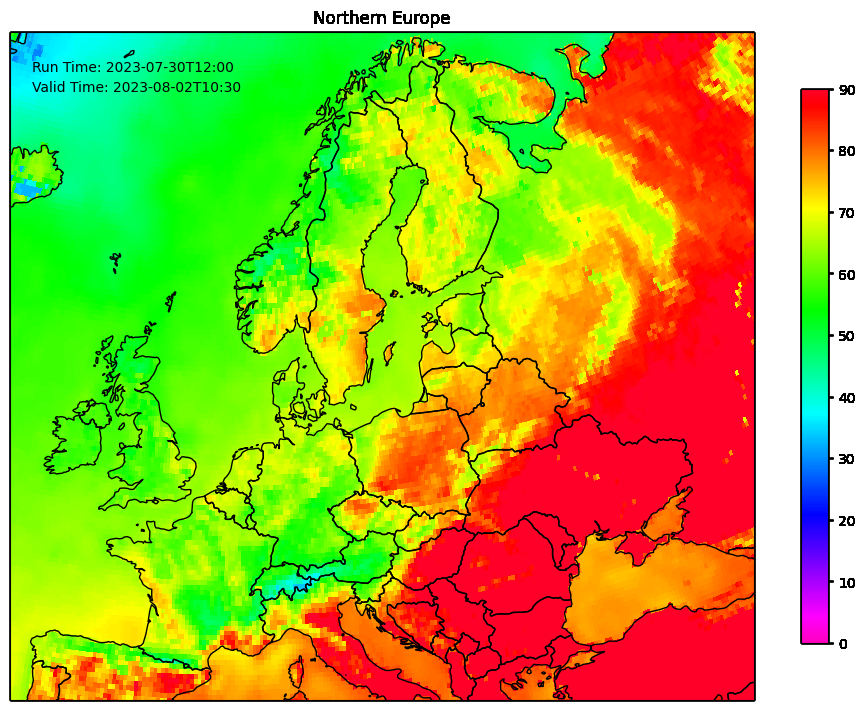

In [10]:
fig = plt.figure()

for i in range(ds_temp.shape[0]):
    
    #convert data
    temp = ds_temp[i,:,:]
    temp = 1.8*(temp-273) + 32
    
    #plot the data
    fig.set_size_inches(12,9)
    ax = fig.add_subplot(111, projection = ccrs.LambertConformal(central_latitude = 60., central_longitude = 5.))
    c = ax.pcolormesh(ds_sel.lon.values, ds_sel.lat.values, temp, transform=ccrs.PlateCarree(), cmap = 'gist_rainbow_r', vmin=0, vmax=90)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical',shrink=0.8)

    #add useful information
    ax.set_extent([-10, 40, 40, 70], crs=ccrs.PlateCarree())
    ax.annotate(f'Valid Time: {str(ds_sel.time1.values[i])[:16]}', (0.03, 0.91), xycoords='axes fraction')
    ax.annotate(f'Run Time: {date_time.strftime("%Y-%m-%dT%H:00")}', (0.03, 0.94), xycoords='axes fraction')
    ax.set_title(f'Northern Europe')
    s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
    PL = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale=s, facecolor='none')
    ax.add_feature(PL, edgecolor='black',  facecolor='none')

    fig.savefig(f'{temp_dir}/{str(ds_sel.time1.values[i])[:16]}.png')
    
plt.show()

### Reflectivity Map

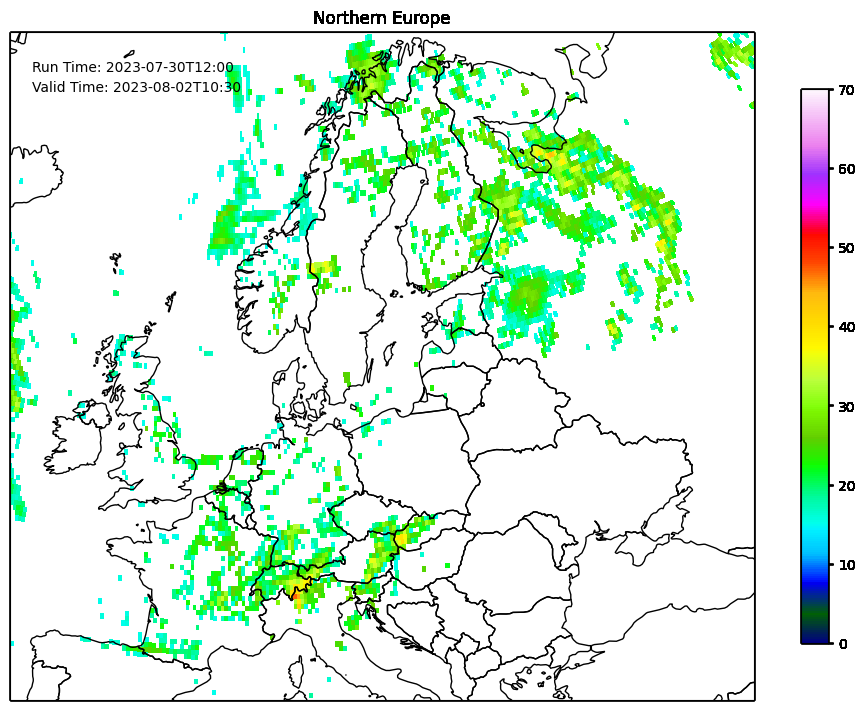

In [11]:
fig = plt.figure()

for j in range(ds_refc.shape[0]):

    refc = ds_refc[j,:,:]
    refc[refc<=15] = np.nan

    fig.set_size_inches(12,9)
    ax = fig.add_subplot(111, projection = ccrs.LambertConformal(central_latitude = 60., central_longitude = 5.))
    c = ax.pcolormesh(ds_sel.lon.values, ds_sel.lat.values, refc, transform=ccrs.PlateCarree(), cmap = 'gist_ncar', vmin=0, vmax=70)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical',shrink=0.8)

    ax.set_extent([-10, 40, 40, 70], crs=ccrs.PlateCarree())
    ax.annotate(f'Valid Time: {str(ds_sel.time1.values[j])[:16]}', (0.03, 0.91), xycoords='axes fraction')
    ax.annotate(f'Run Time: {date_time.strftime("%Y-%m-%dT%H:00")}', (0.03, 0.94), xycoords='axes fraction')
    ax.set_title(f'Northern Europe')
    s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
    PL = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale=s, facecolor='none')
    ax.add_feature(PL, edgecolor='black',  facecolor='none')

    fig.savefig(f'{precip_dir}/{str(ds_sel.time1.values[j])[:16]}.png')
    
plt.show()

### Temperature Time Series

In [14]:
point_temp = ds_sel['Temperature_surface'].sel(lat = 60.25 , lon =5.5).values
point_temp = (point_temp - 273.15) * 9/5 + 32

ds_time = ds_sel.time2.values

Text(0.5, 1.0, 'Temperature in $\\degree$F')

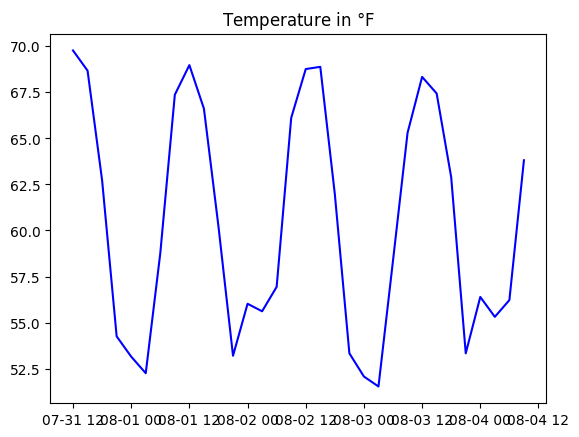

In [15]:
#create a line graph
plt.plot(ds_time, point_temp, color = 'blue')
plt.title('Temperature in $\degree$F')

### Precipation Time Series

In [16]:
precip_point = ds_sel['Precipitation_rate_surface'].sel(lat = 60.25 , lon =5.5).values
precip_mix_point = ds_sel['Precipitation_rate_surface_Mixed_intervals_Average'].sel(lat = 60. , lon =5.5).values

In [17]:
precip_point = precip_point * 3600
precip_mix_point = precip_mix_point * 3600

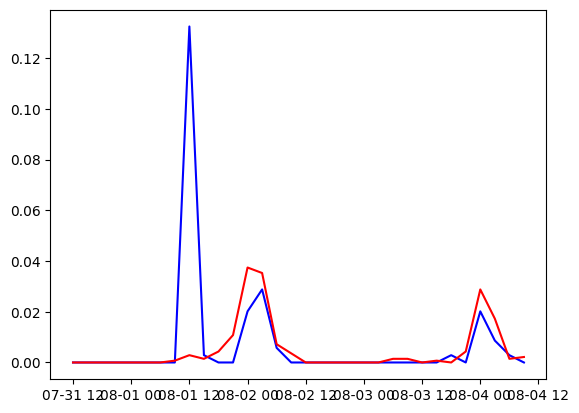

In [18]:
plt.plot(ds_time, precip_point, color = 'blue')
plt.plot(ds_time, precip_mix_point, color = 'red')

## Create GIFs

In [19]:
#Build temp GIF
temp_images = glob.glob(f'{temp_dir}/*')

with imageio.get_writer(f'{temp_dir}/temp_{date_time.strftime("%Y%m%dT%H00")}.gif', mode='I') as writer:
    for filename in temp_images:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

In [20]:
#Build precip GIF
precip_images = glob.glob(f'{precip_dir}/*')

with imageio.get_writer(f'{precip_dir}/precip_{date_time.strftime("%Y%m%dT%H00")}.gif', mode='I') as writer:
    for filename in precip_images:
        image = imageio.v2.imread(filename)
        writer.append_data(image)